# Algorithmic Poster Contest 

This is my notebook with source-code of image generation with some tests for the **algorithmic art poster contest**.

## ASCII art try

Not used but still funny.

In [2]:
from ascii_magic import AsciiArt
from PIL import ImageEnhance

my_art = AsciiArt.from_image('data/me.jpg')
# my_art.image = ImageEnhance.Brightness(my_art.image).enhance(0.2)
my_art.to_html_file('ascii_art.html', columns=200, width_ratio=2)
# my_art.to_terminal()


'<span style="color: #3b3a37">|</span><span style="color: #3c3b38">\\</span><span style="color: #40403a">%</span><span style="color: #3d3d38">></span><span style="color: #3a3a37">|</span><span style="color: #393937">+</span><span style="color: #383837">^</span><span style="color: #393937">/</span><span style="color: #3c3b37">)</span><span style="color: #3f3d38">)</span><span style="color: #444038">x</span><span style="color: #484338">l</span><span style="color: #554d3a">!</span><span style="color: #5f4f3f">1</span><span style="color: #584740">?</span><span style="color: #4d433f">{</span><span style="color: #4e4440">*</span><span style="color: #48403d">l</span><span style="color: #463d3c">v</span><span style="color: #433b3a">></span><span style="color: #433a39">></span><span style="color: #473c3a">v</span><span style="color: #483e39">%</span><span style="color: #554743">?</span><span style="color: #84646c">w</span><span style="color: #a0717e">p</span><span style="color: #916069">w</span

## Image modification 

I modify a picture of me to get a psychedelic effect on it. 

I use the library CV2 to play with the images.

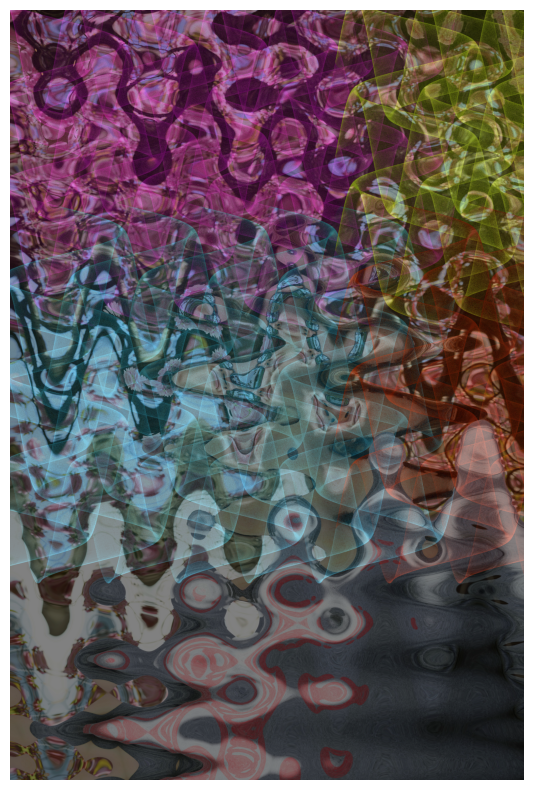

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the image
image = cv2.imread('data/me.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# Set distortion parameters
rows, cols, _ = image.shape
frequency = random.randint(2000, 4000)  # Frequency of the waves
amplitude = random.randint(400, 1150)  # Amplitude of the waves

# Create a color map for different regions
colors = [
    [random.randint(150, 255), random.randint(0, 100), random.randint(150, 255)],
    [random.randint(0, 100), random.randint(150, 255), random.randint(150, 255)],
    [random.randint(150, 255), random.randint(150, 255), random.randint(0, 100)],
    [random.randint(150, 255), random.randint(0, 100), random.randint(0, 100)]
]

# Create a mesh grid of the original coordinates
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Apply sinusoidal distortion
x_distorted = (x + amplitude * np.sin(8 * np.pi * y / frequency)).astype(np.float32)
y_distorted = (y + amplitude * np.cos(6 * np.pi * x / frequency)).astype(np.float32)

# Map the distorted coordinates to the original image
distorted_image = cv2.remap(image, x_distorted, y_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# Initialize the output image
output_image = np.zeros_like(image)

# Define groups of pixels and apply distortions
for i, (color, freq, amp) in enumerate(zip(colors, [frequency] * 4, [amplitude] * 4)):
    # Create a mask for the current group (example: different quadrants)
    mask = np.zeros((rows, cols), dtype=np.uint8)
    if i == 0:  # Top-left quadrant
        mask[0:rows//2, 0:cols//2] = 255
    elif i == 1:  # Top-right quadrant
        mask[0:rows//2, cols//2:cols] = 255
    elif i == 2:  # Bottom-left quadrant
        mask[rows//2:rows, 0:cols//2] = 255
    elif i == 3:  # Bottom-right quadrant
        mask[rows//2:rows, cols//2:cols] = 255

    # Create a mesh grid for the current group
    y_indices, x_indices = np.where(mask == 255)
    for x, y in zip(x_indices, y_indices):
        # Apply different sinusoidal distortions based on the group
        y_distorted = x + int(amp * np.sin(8 * np.pi * y / freq))
        x_distorted = y + int(amp * np.cos(6 * np.pi * x / freq))
        
        # Ensure the distorted indices are within bounds
        if 0 <= x_distorted < cols and 0 <= y_distorted < rows:
            # Set the pixel color based on the group
            output_image[y_distorted, x_distorted] = color

# Blend with original image to see the distortions
final_image = cv2.addWeighted(distorted_image, 0.5, output_image, 0.5, 0)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()


In [3]:
cv2.imwrite('data/distorted_image4.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

True

In [3]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import morphology
from noise import pnoise2  # Import Perlin noise
from PIL import Image

dpi = 300
a1_size = (7016, 9933)

In [ ]:

seed = 90 # Seed for random number generation

random.seed(seed)  # Set random seed for reproducibility
np.random.seed(seed)

# Load the image
image = cv2.imread('data/me.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# Set parameters
rows, cols, _ = image.shape
scale = random.randint(1000, 4000)  # Scale of Perlin noise
num_regions = random.randint(2500, 6000)  # Approximate number of regions

# Generate Perlin noise for smooth, organic patterns
perlin_noise = np.zeros((rows, cols))
octaves = 6
persistence = 0.25
lacunarity = 2.0
for i in range(rows):
    for j in range(cols):
        perlin_noise[i][j] = pnoise2(i / scale, j / scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity, repeatx=cols, repeaty=rows, base=seed)

# Normalize the noise to the range [0, 255]
perlin_noise = ((perlin_noise - perlin_noise.min()) * (255 / (perlin_noise.max() - perlin_noise.min()))).astype(np.uint8)

# Threshold the noise to create regions
_, regions = cv2.threshold(perlin_noise, 128, 255, cv2.THRESH_BINARY)

# Further separate into more regions by applying erosion and dilation
regions = morphology.label(morphology.dilation(morphology.erosion(regions, morphology.disk(random.randint(5, 22))), morphology.disk(random.randint(35, 56))))

# Generate random colors for each unique region
unique_regions = np.unique(regions)
region_colors = {
    region_id: [random.randint(150, 255), random.randint(0, 128), random.randint(150, 255)]
    for region_id in unique_regions if region_id != 0
}

# Initialize the overlay with random colors based on the regions
overlay = np.zeros_like(image)
for y in range(rows):
    for x in range(cols):
        region_id = regions[y, x]
        if region_id != 0:  # Ignore the background
            overlay[y, x] = region_colors[region_id]

# Apply sinusoidal distortion to the overlay for an extra psychedelic effect
frequency = random.randint(2000, 4000)  # Frequency of the waves
amplitude = random.randint(400, 1150)  # Amplitude of the waves

# Apply sinusoidal distortion to the overlay for an extra psychedelic effect
frequency_img = random.randint(1200, 2000)  # Frequency of the waves
amplitude_img = random.randint(400, 1000)  # Amplitude of the waves

# Create mesh grid for distortion
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
x_distorted = (x + amplitude * np.sin(8 * np.pi * y / frequency)).astype(np.float32)
y_distorted = (y + amplitude * np.cos(6 * np.pi * x / frequency)).astype(np.float32)

x_img, y_img = np.meshgrid(np.arange(cols), np.arange(rows))
x_distorted_img = (x + amplitude * np.sin(8 * np.pi * y / frequency)).astype(np.float32)
y_distorted_img = (y + amplitude * np.cos(6 * np.pi * x / frequency)).astype(np.float32)

# Remap the overlay to apply the distortion
distorted_overlay = cv2.remap(overlay, x_distorted, y_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
distorted_image = cv2.remap(image, x_distorted_img, y_distorted_img, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

alpha = 0.2
beta = 0.7
# Blend with original image
# final_image = cv2.addWeighted(image, alpha, distorted_overlay, beta, 0)
final_image = cv2.addWeighted(distorted_image, alpha, distorted_overlay, beta, 0)
cv2.imwrite(f'data/result_seed-{seed}_oct-{octaves}_lac-{lacunarity}_pers-{persistence}_alpha-{alpha}_beta-{beta}.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.axis('off')
plt.show()

## Parsing a saved image for reproducabiolity

In [5]:
full_keys = {
    "oct": "octaves",
    "lac": "lacunarity",
    "pers": "persistence",
    "xf": "x_factor",
    "yf": "y_factor",
    "numregions": "num_regions",
}

def parse_parameters_of_file(file):
    """
    Parse the parameters from the filename.
    Example: result_seed-4815162342_alpha-0.4_beta-1.0_oct-6_lac-2.0_pers-0.5_scale-100_numregions-200_xf-0.2_yf-0.2.jpg
    """
    filename = file.split('/')[-1]
    filename = filename[:-4]  # Remove the file extension
    parameters = filename.split('_')[1:]
    parsed_parameters = {}
    for param in parameters:
        key, value = param.split('-')
        if '.' in value:
            value = float(value)
        else:
            value = int(value)

        if key in full_keys:
            key = full_keys[key]
    
        parsed_parameters[key] = value
    return parsed_parameters

## White frame adding function

In [4]:
def add_white_frame(image, border_size=25, frame_color=(255, 255, 255), top_text=None, bottom_text=None, text_color=(0, 0, 0)):
    """
    Add a white frame around the image.
    """
    # Create a new image with additional space for the frame
    frame_image = cv2.copyMakeBorder(
        image,
        border_size,     # Top border
        border_size,     # Bottom border
        border_size,     # Left border
        border_size,     # Right border
        cv2.BORDER_CONSTANT,
        value=frame_color
    )

    # Define text properties
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 3
    font_thickness = 6

    # Get the text size to center it
    (top_text_width, top_text_height), _ = cv2.getTextSize(top_text, font, font_scale, font_thickness)
    (bottom_text_width, bottom_text_height), _ = cv2.getTextSize(bottom_text, font, font_scale, font_thickness)

    # Calculate the text position for top and bottom
    top_text_x = (frame_image.shape[1] - top_text_width) // 2
    top_text_y = border_size // 2 + top_text_height // 2

    bottom_text_x = (frame_image.shape[1] - bottom_text_width) // 2
    bottom_text_y = frame_image.shape[0] - border_size // 2 + bottom_text_height // 2

    # Add text to the image
    cv2.putText(frame_image, top_text, (top_text_x, top_text_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame_image, bottom_text, (bottom_text_x, bottom_text_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    return frame_image

## Image distortion

In [6]:
def distord_image(image, seed, alpha, beta, octaves, persistence, lacunarity, x_factor, y_factor, scale, num_regions, save, display):
    random.seed(seed)  # Set random seed for reproducibility
    np.random.seed(seed//2)

    seed_perlin = random.randint(0, 255)  # Seed for Perlin noise

    # Load the image
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    # Set parameters
    rows, cols, _ = image.shape
    
    # Generate Perlin noise for smooth, organic patterns
    perlin_noise = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            perlin_noise[i][j] = pnoise2(i / scale, j / scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity, repeatx=cols, repeaty=rows, base=seed_perlin)

    # Normalize the noise to the range [0, 255]
    perlin_noise = ((perlin_noise - perlin_noise.min()) * (255 / (perlin_noise.max() - perlin_noise.min()))).astype(np.uint8)

    # Threshold the noise to create regions
    _, regions = cv2.threshold(perlin_noise, 128, 255, cv2.THRESH_BINARY)

    # Further separate into more regions by applying erosion and dilation
    regions = morphology.label(morphology.dilation(morphology.erosion(regions, morphology.disk(20)), morphology.disk(20)))

    # Generate random colors for each unique region
    unique_regions = np.unique(regions)
    region_colors = {
        region_id: [random.randint(10, 200), random.randint(0, 200), random.randint(10, 200)]
        for region_id in unique_regions if region_id != 0
    }

    # Initialize the overlay with random colors based on the regions
    overlay = np.zeros_like(image)
    for y in range(rows):
        for x in range(cols):
            region_id = regions[y, x]
            if region_id != 0:  # Ignore the background
                overlay[y, x] = region_colors[region_id]

    # Apply sinusoidal distortion to the overlay for an extra psychedelic effect
    frequency = random.randint(500, 1200)
    amplitude = random.randint(400, 800)

    # Create mesh grid for distortion
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    x_distorted = (x + amplitude * np.sin(x_factor * np.pi * y / frequency)).astype(np.float32)
    y_distorted = (y + amplitude * np.cos(y_factor * np.pi * x / frequency)).astype(np.float32)

    # Remap the overlay to apply the distortion
    distorted_overlay = cv2.remap(overlay, x_distorted, y_distorted, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

    # white_overlay = np.ones_like(image) * 255
    # image = cv2.addWeighted(image, 0.9, white_overlay, 0.1, 0)

    # Blend with original image
    final_image = cv2.addWeighted(image, alpha, distorted_overlay, beta, 0)
    final_image = add_white_frame(final_image, border_size=200, top_text=f'Psychedelic Cherry Tree | Esther Pytlak', bottom_text=f'ISTIC | 2024-2025 | Informatique-Electronique')

    final_image = cv2.resize(final_image, a1_size, interpolation=cv2.INTER_LANCZOS4)
    final_image = Image.fromarray(final_image)

    if save:
        path = f'data/result_seed-{seed}_alpha-{alpha}_beta-{beta}_oct-{octaves}_lac-{lacunarity}_pers-{persistence}_scale-{scale}_numregions-{num_regions}_xf-{x_factor}_yf-{y_factor}.jpg'
        # cv2.imwrite(path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))
        final_image.save(path, dpi=(dpi, dpi))

    if display:
        # Display the final image
        plt.figure(figsize=(10, 10))
        plt.imshow(final_image)
        plt.axis('off')
        plt.show()

### Example of usage

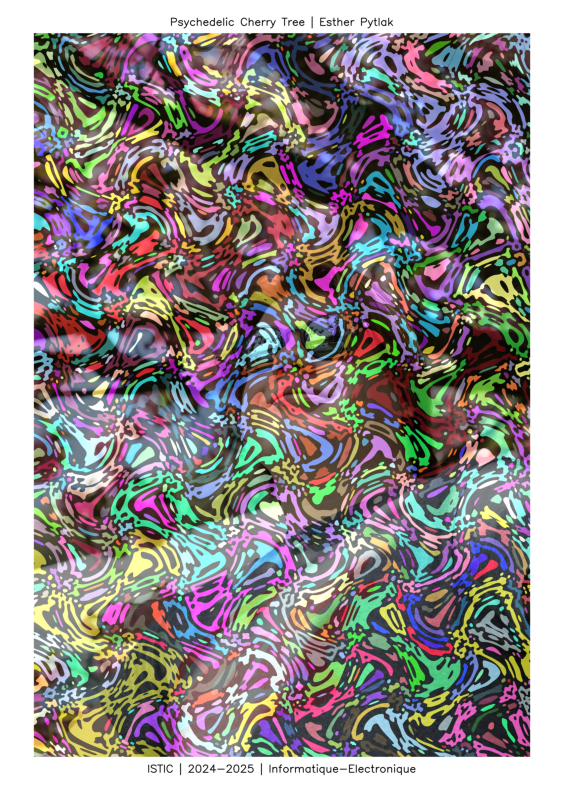

In [9]:
parameters = {
    'image': 'data/me.jpg', # Image to distort
    'seed': 4815162342, # Seed for random number generation
    'alpha': 0.55, # Alpha blending parameter
    'beta': 1.0, # Beta blending parameter
    'octaves': 6, # Number of octaves for Perlin noise
    'persistence': 0.5, # Persistence for Perlin noise
    'lacunarity': 1.0, # Lacunarity for Perlin noise
    'x_factor': 2.3, # Factor for x-axis distortion
    'y_factor': 2.3, # Factor for y-axis distortion
    'scale': 100, # Scale for Perlin noise
    'num_regions': 200, # Number of regions for Perlin noise
    'save': False, # Save the image
    'display': True # Display the image
}

distord_image(**parameters)

## Re-use the same parameters 

The parameters to get the image are saved in its filename. 

We provide a function to parse the filename of an image and use the same parameters.

### Example

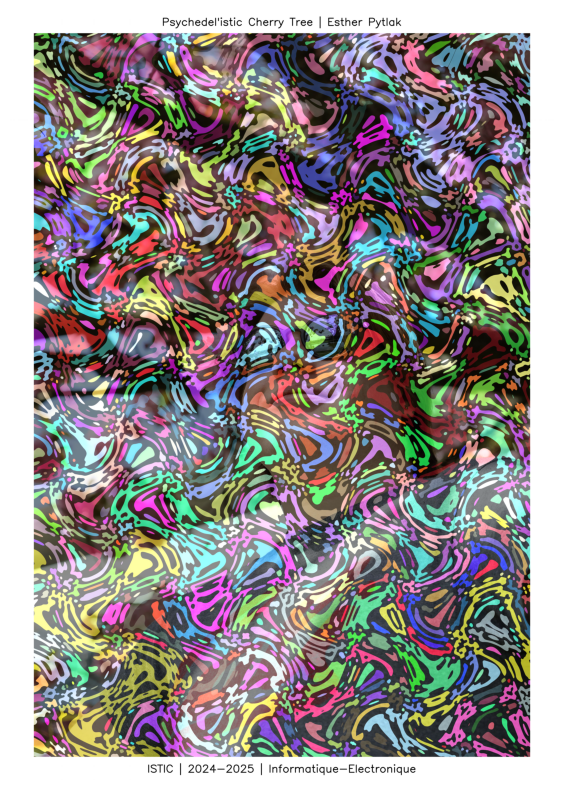

In [43]:
nice_one = "data/result_seed-4815162342_alpha-0.55_beta-1.0_oct-6_lac-1.0_pers-0.5_scale-100_numregions-200_xf-2.3_yf-2.3.jpg"

parameters = parse_parameters_of_file(nice_one)
parameters = {
    'image': 'data/me.jpg',
    **parameters,
    'save': False,
    'display': True
}
# parameters["alpha"] = 0.5
distord_image(**parameters)

## Adding a frame to an existing image

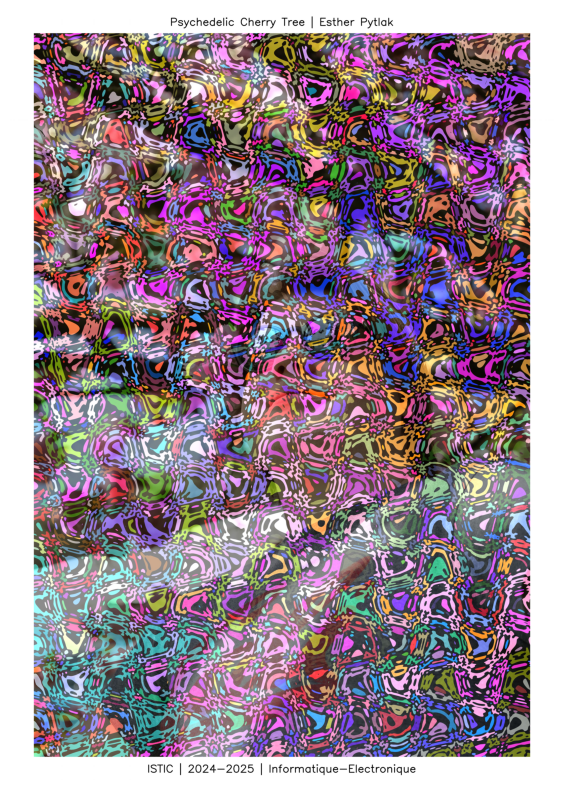

In [10]:
good_image = "data/result_seed-4815162342_alpha-0.55_beta-1.0_oct-6_lac-1.0_pers-0.5_scale-100_numregions-200_xf-2.3_yf-2.3.jpg"
good_image = cv2.imread(good_image, cv2.IMREAD_UNCHANGED)
good_image = cv2.cvtColor(good_image, cv2.COLOR_BGR2RGB)

# add white frame
good_image = add_white_frame(good_image, border_size=200, top_text=f'Psychedelic Cherry Tree | Esther Pytlak', bottom_text=f'ISTIC | 2024-2025 | Informatique-Electronique')

resized_image = cv2.resize(good_image, a1_size, interpolation=cv2.INTER_LANCZOS4)
resized_image_pil = Image.fromarray(resized_image)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(resized_image_pil)
plt.axis('off')
plt.show()

# cv2.imwrite('data/psychedelic_cherry_tree_1.jpg', cv2.cvtColor(good_image, cv2.COLOR_BGR2RGB))
resized_image_pil.save('data/psychedelic_cherry_tree_1.jpg', dpi=(dpi, dpi))
resized_image_pil.save('data/psychedelic_cherry_tree_1.pdf', "PDF", resolution=100.0)